In [6]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi,sin,cos,linspace
from IPython import display
import time
import utils

先来看一个锯齿函数的傅里叶级数展开的动图， 这是一个有很多阶的正弦函数叠加得到的函数

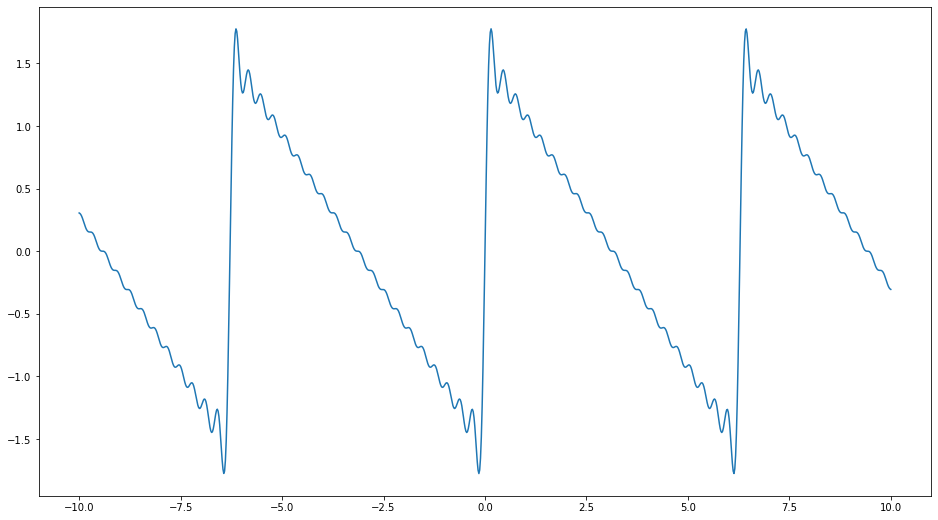

In [7]:
x = np.linspace(-10,10,1000)

for i in range(1,21): # 只叠加至20阶, 叠加至inf阶将 = 锯齿函数
    y = utils.sawtooth(i,x) # 锯齿函数的傅里叶级数展开形式
    plt.figure(figsize=(16,9))
    plt.plot(x,y)
    plt.show()
    time.sleep(0.3)
    display.clear_output(wait=True)

对函数$f(x) = a_1 sin(w_1x + b_1) + a_2 sin(w_2x + b_2) + ... $而言，$w$通常称为角频率，它与振荡频率$f$的关系是：$ w=2\pi f$

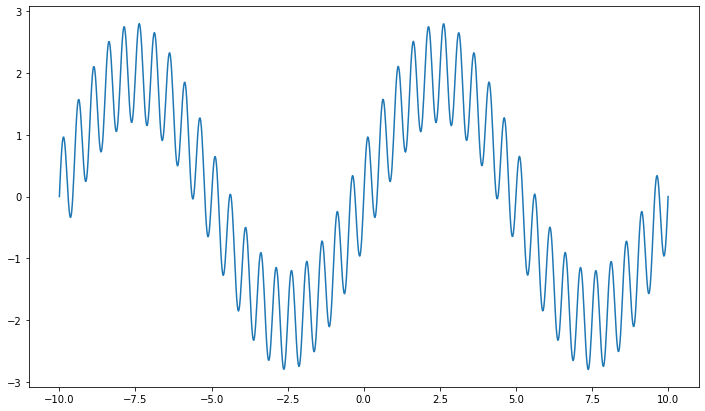

In [8]:
x_min, x_max = -10, 10
x = np.linspace(x_min,x_max,1000)

f1, f2, f3 = 0.1, 2, 8
w1, w2, w3 = 2*pi*f1, 2*pi*f2, 2*pi*f3
y = 2*sin(w1*x) + 0.8* sin(w2*x) # + 0.2 * sin(w3*x)

plt.figure(figsize=(12,7))
plt.plot(x,y)
plt.show()

我们看一下，上面的函数在频率域中是啥样子的：

In [9]:
fre_y = np.fft.fft(y)
print(y.shape, fre_y.shape)
fre_y[:10]

(1000,) (1000,)


array([-7.99360578e-15+0.00000000e+00j,  4.24423637e-03-1.35097795e+00j,
        6.28020971e+00-9.99513266e+02j, -2.21130393e-02+2.34619687e+00j,
       -1.57738446e-02+1.25517660e+00j, -1.33947908e-02+8.52668732e-01j,
       -1.18552882e-02+6.28868081e-01j, -1.05434364e-02+4.79362715e-01j,
       -9.25699798e-03+3.68246692e-01j, -7.90703509e-03+2.79579634e-01j])

可以看到转到频率域后的函数与原函数具有相同的size, 并且它的每个值都是复数，下面看一下这些复数的模的图像：

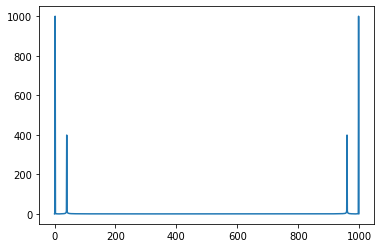

In [10]:
plt.plot(np.abs(fre_y))

它是看到它是关于中心对称的，这是fft的结果，下面将它的值移动到中心去才是函数y真正的频率图像：

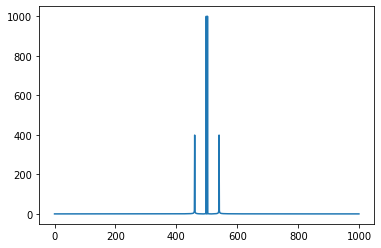

In [11]:
fre_y_shift = np.fft.fftshift(fre_y)
plt.plot(np.abs(fre_y_shift))

这是我们还没有给它设置含坐标刻度。它的很坐标的意义是频率值，中心点的频率为0，最右侧的频率应该是这个频率空间的最大频率值（听上去像废话），左边是跟右边对称的。那么最重要的就是确定出这个频率空间的最大频率是多少。  
而这个最大频率是由原始空间（坐标空间）x和y决定，我们的x一共有1000个值，分布-10 ~ 10之间，那么x的最小间隔$\delta x = \frac{x_{max}- x_{min}}{N-1}= \frac{20}{1000-1}$，那么想象下，2个振荡周期最少需要几个坐标点？

咳咳，这个还是手画比较方便... 两个周期最小需要5个点。 就想象那个锯齿函数就可以了嘛。  
那么N个点可以承载最多$\frac{N-1}{2}$个周期. 那时一个周期的距离就是两倍最小间隔$2\delta x$ . 
这时我们就有： 
\begin{equation} 
T = 2\delta x  \\
f_{max} = \frac{1}{T} = \frac{1}{2\delta x}
\end{equation}
同样，对于频率f而言，有：
\begin{equation} 
\delta f = \frac{2f_{max}}{N-1}
\end{equation}

In [12]:
delta_x = (x_max - x_min)/(len(x)-1)

print(delta_x)
f_max = 1/(2*delta_x)
f_max

0.02002002002002002


24.975

In [13]:
# delta_f = 2*f_max/(len(x)-1)

接下来，我们要将分配从-f_max ~ f_max 到频率的坐标的刻度：

0.05000000000000071


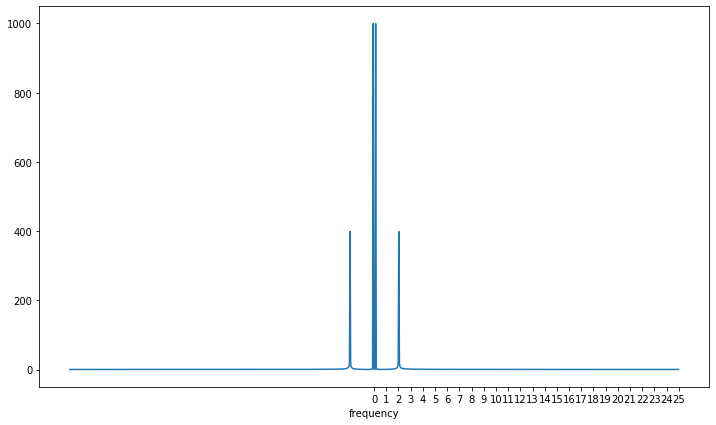

In [14]:
fre_x = np.linspace(-f_max,f_max,len(x))
print(fre_x[1]-fre_x[0])

plt.figure(figsize=(12,7))
plt.plot(fre_x,np.abs(fre_y_shift))
plt.xlabel('frequency')
plt.xticks(np.arange(0,26,1));

上图可以看到在频率为 0附近 以及 2附近存在两个峰，而这两个频率就是一开始时我们所设置的f1 和 f2 ,分别为0.1 和 2  
x轴的意义弄清楚了。而y轴，对应的当然是振幅啦，只是我们需要进行一个规范化的操作：2*abs(fre_y_shift)/N-1

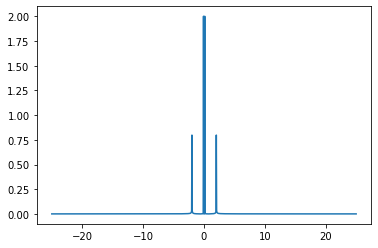

In [15]:
amplitude_y = 2*np.abs(fre_y_shift)/(len(x)-1)
plt.plot(fre_x,amplitude_y)

至此，频率和振幅的事情我们都弄清楚了，那么滤波怎么操作？  
加入我现在要把大于1的频率都过滤掉，我们可以如下操作：

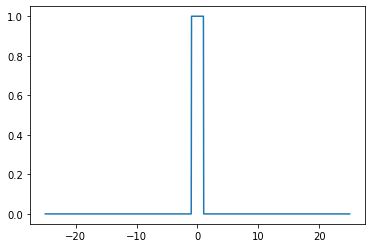

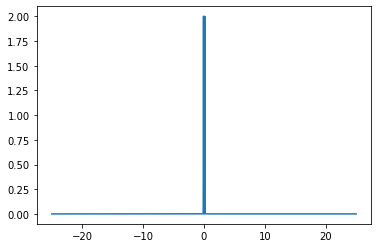

In [16]:
def ideal_low_pass_Filter(fre, r):
    '''
    理想低通滤波器
    '''
    ILF = np.zeros(fre.shape)
    ILF[np.abs(fre)<r] = 1
    return ILF

filter1 = ideal_low_pass_Filter(fre_x, 1)
# 看一看这个滤波器的样子
plt.plot(fre_x,filter1)
plt.show()
# 滤波后的频率图像
plt.figure()
plt.plot(fre_x, amplitude_y * filter1)

这样就把原来f = 2的频率给过滤掉了...简单粗暴  
现在看看经过ILF滤波器后的频率变换回空间域是啥样子：

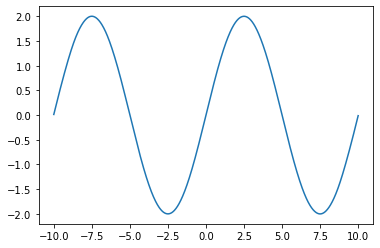

In [17]:
filtered_fre = fre_y_shift * filter1 # 滤波
fre_y_ishift = np.fft.ifftshift(filtered_fre) # 先中心变回到两侧去
y_filtered = np.fft.ifft(fre_y_ishift) # 再傅里叶逆变换

plt.plot(x, np.real(y_filtered));

# 滤波与卷积的关系
我们知道，卷积操作是很直观的，因为它就发生在空间域中。而滤波则通常在频率空间中。  
而它们是等价的，卷积定理说明了它们的等价关系，虽然我公式都忘记了...